# 数据可视化作业题目

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [96]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数
print(data.shape)
print(data.head())

(144, 3)
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


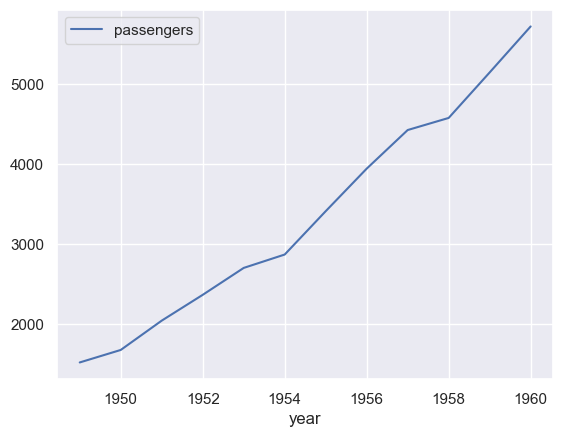

In [97]:
#用dataframe表示数据
df = pd.DataFrame(data)
#按年分组求和
df_year = df.groupby('year').sum()
sns.set()
#seaborn绘制折线图
sns.lineplot(data=df_year)
plt.show()

Index(['year', 'month', 'passengers'], dtype='object')


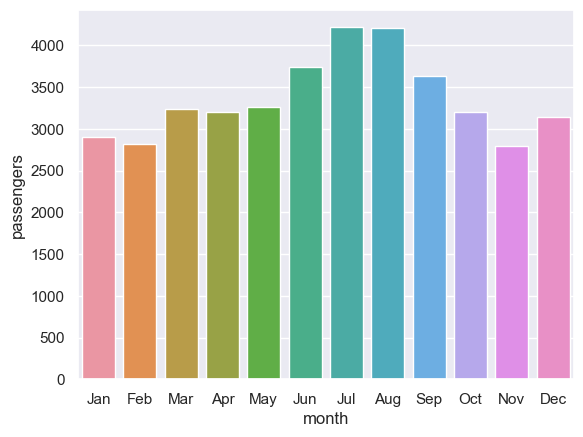

In [98]:
#绘制乘客量在12个月的分布柱状图

df_month= df.groupby('month')['passengers'].sum().reset_index()
print(df.columns)
sns.barplot(data=df_month, x='month', y='passengers')
plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [99]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类
print(data.shape)
print(data.head())

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


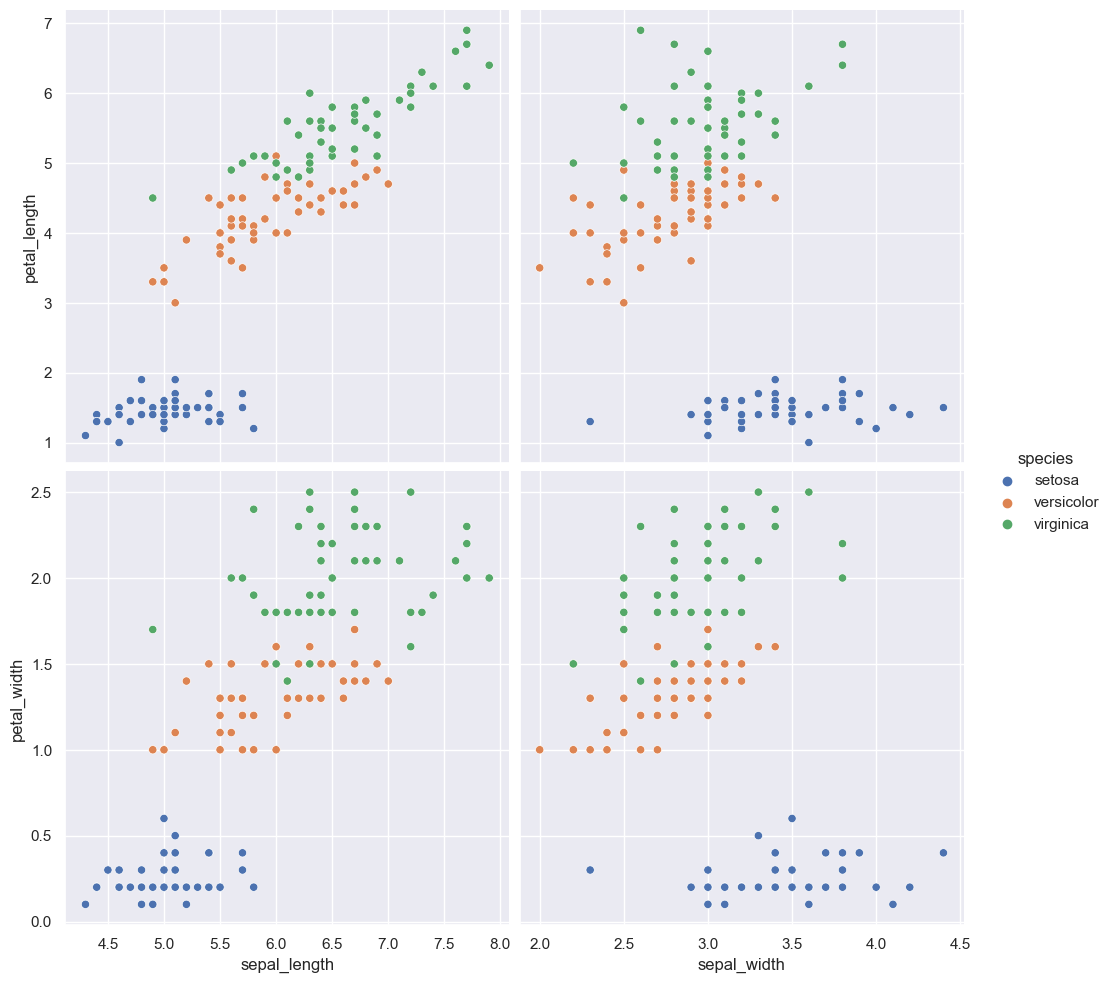

In [100]:
#萼片（sepal）和花瓣（petal）的大小关系（散点图）,包含width和length的组合,pairplot
sns.pairplot(data, x_vars=['sepal_length', 'sepal_width'], y_vars=['petal_length', 'petal_width'], hue='species', height=5, aspect=1, kind='scatter')

<AxesSubplot:title={'center':'virginica'}>

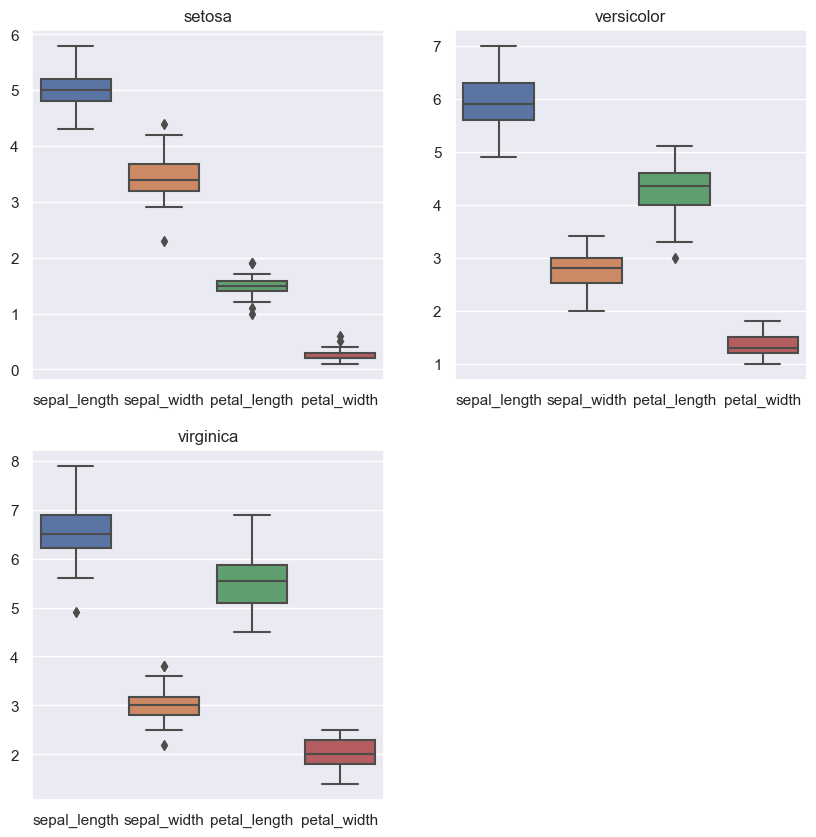

In [101]:
#绘制箱图，每幅图包含sepal_length,petal_length,sepal_width,petal_width四个属性
subset_setosa = data[data['species'] == 'setosa']
subset_versicolor = data[data['species'] == 'versicolor']
subset_virginica = data[data['species'] == 'virginica']
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('setosa')
sns.boxplot(data=subset_setosa)
plt.subplot(2, 2, 2)
plt.title('versicolor')
sns.boxplot(data=subset_versicolor)
plt.subplot(2, 2, 3)
plt.title('virginica')
sns.boxplot(data=subset_virginica)




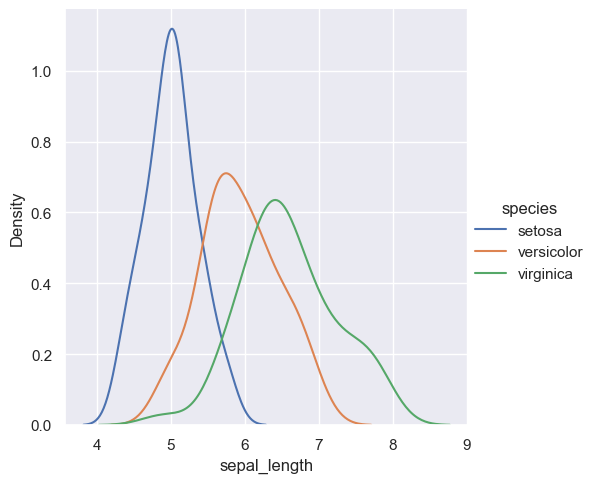

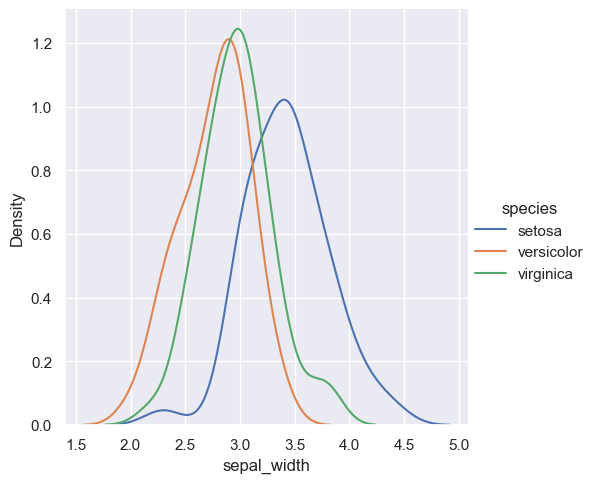

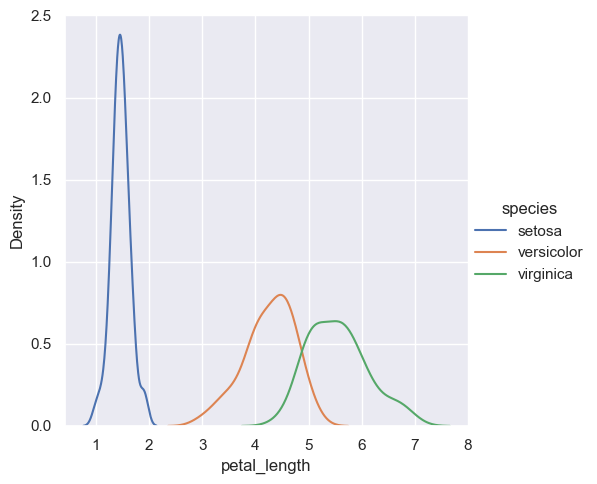

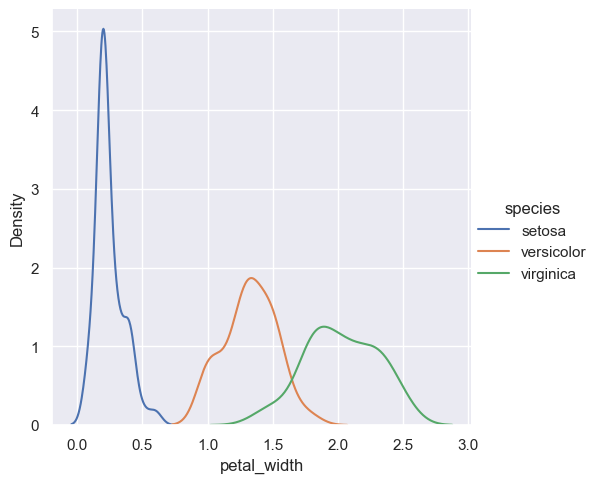

In [102]:
#不同种类鸢尾花萼片长宽和花瓣长宽的分布情况（核密度估计）
sns.FacetGrid(data, hue='species', height=5).map(sns.kdeplot, 'sepal_length').add_legend()
sns.FacetGrid(data, hue='species', height=5).map(sns.kdeplot, 'sepal_width').add_legend()
sns.FacetGrid(data, hue='species', height=5).map(sns.kdeplot, 'petal_length').add_legend()
sns.FacetGrid(data, hue='species', height=5).map(sns.kdeplot, 'petal_width').add_legend()
plt.show()

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [103]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数
print(data.shape)
print(data.head())

(244, 7)
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


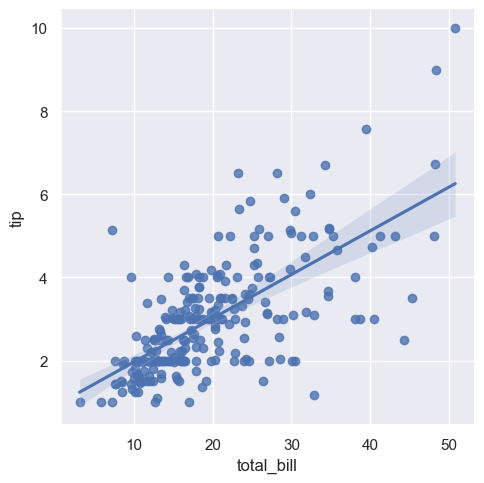

In [104]:
#1. 小费和总消费之间的关系（提示：散点图+回归分析）
sns.lmplot(x='total_bill', y='tip', data=data)

<AxesSubplot:xlabel='sex', ylabel='tip'>

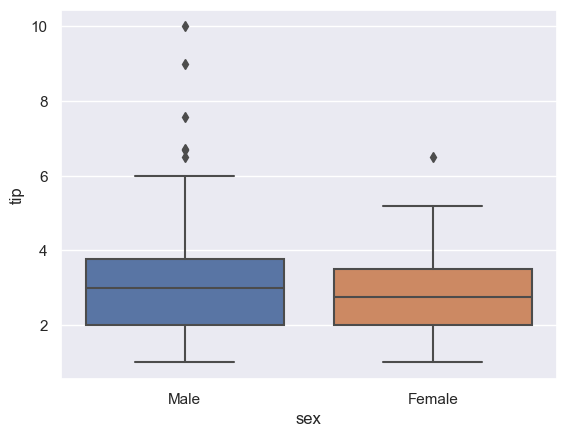

In [105]:
#2.男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
sns.boxplot(x="sex", y="tip", data=data)

<AxesSubplot:xlabel='smoker', ylabel='tip'>

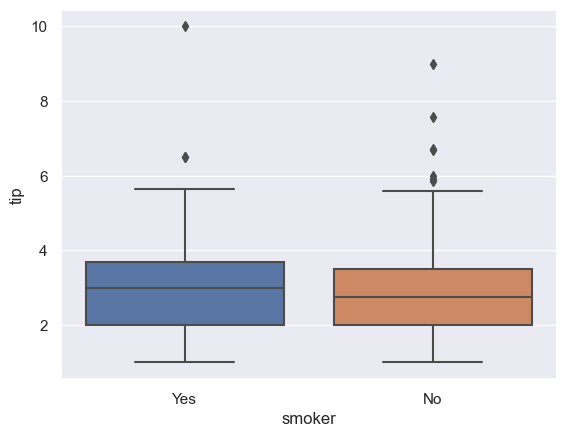

In [106]:
#3.抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
sns.boxplot(x="smoker", y="tip", data=data)


<AxesSubplot:xlabel='day', ylabel='tip'>

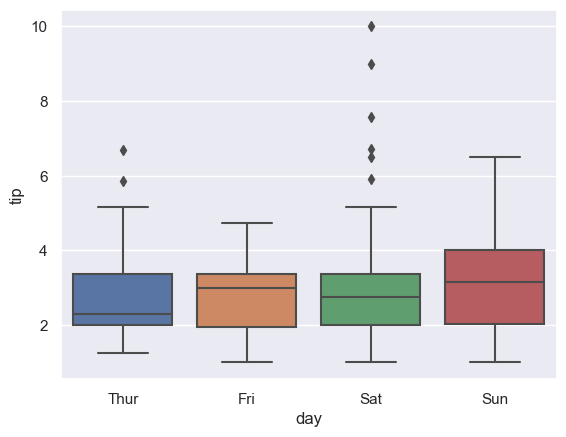

In [107]:
#4.工作日和周末，哪天顾客更慷慨（提示：箱图或者提琴图）
sns.boxplot(x="day", y="tip", data=data)

<AxesSubplot:xlabel='time', ylabel='tip'>

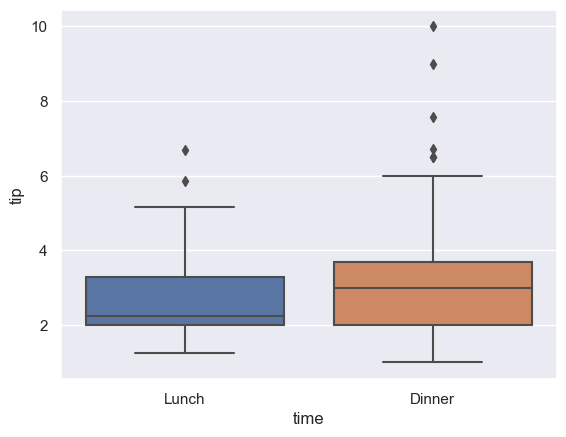

In [108]:
#5.午饭和晚饭，哪个时间段顾客更慷慨（提示：箱图或者提琴图）
sns.boxplot(x="time", y="tip", data=data)


<AxesSubplot:xlabel='size', ylabel='tip'>

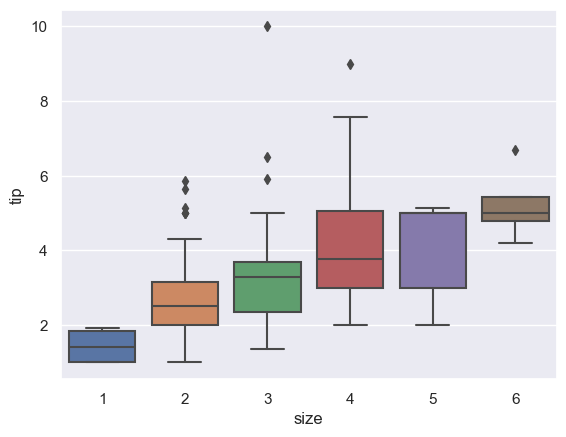

In [109]:
#6.顾客人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
sns.boxplot(x="size", y="tip", data=data)

<AxesSubplot:xlabel='sex', ylabel='tip'>

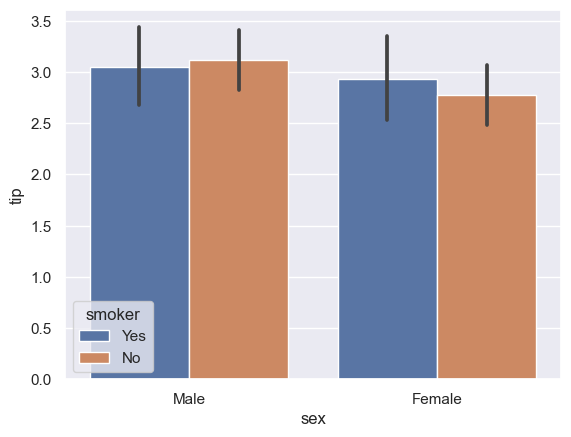

In [110]:
#7.性别，抽烟与否是否会对小费金额产生影响（提示：柱状图）
sns.barplot(x="sex", y="tip", hue="smoker", data=data)


## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [111]:
data = sns.load_dataset("titanic")
data.head()
print(data.shape)
print(data.head())
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<AxesSubplot:xlabel='class', ylabel='survived'>

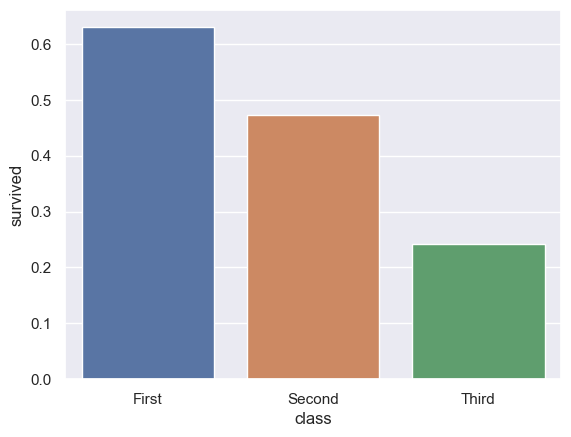

In [115]:
#1. 不同仓位等级中survived vs unsurvived的分布（提示：箱图）
survival_proportion_by_class = data.groupby('class')['survived'].mean().reset_index()
sns.barplot(data=survival_proportion_by_class, x='class', y='survived')


<AxesSubplot:xlabel='sex', ylabel='survived'>

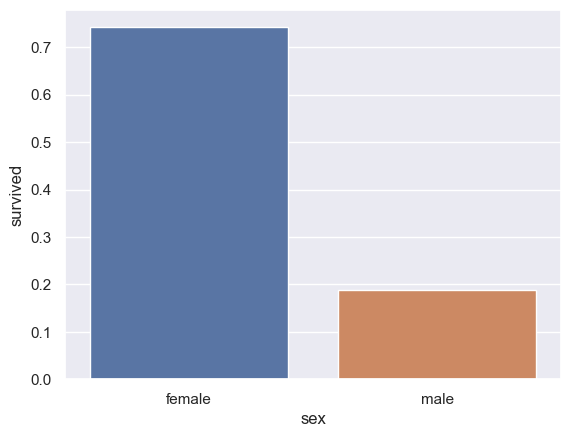

In [118]:
#2. 不同性别的幸存比例（提示：箱图或者提琴图）
survival_proportion_by_sex = data.groupby('sex')['survived'].mean().reset_index()
sns.barplot(data=survival_proportion_by_sex, x='sex', y='survived')

<AxesSubplot:xlabel='survived', ylabel='age'>

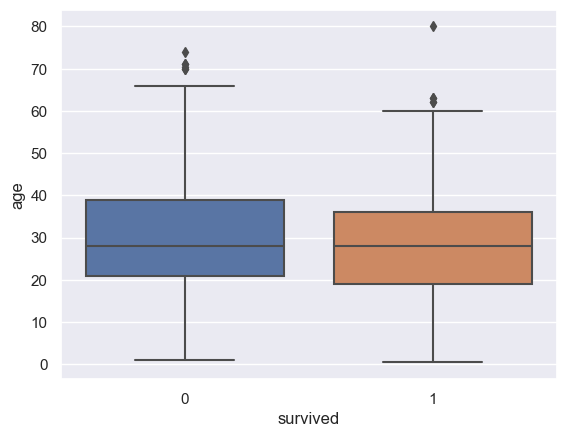

In [125]:
# 3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
# 4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
sns.boxplot(data=data, x='survived', y='age')


<AxesSubplot:xlabel='survived', ylabel='fare'>

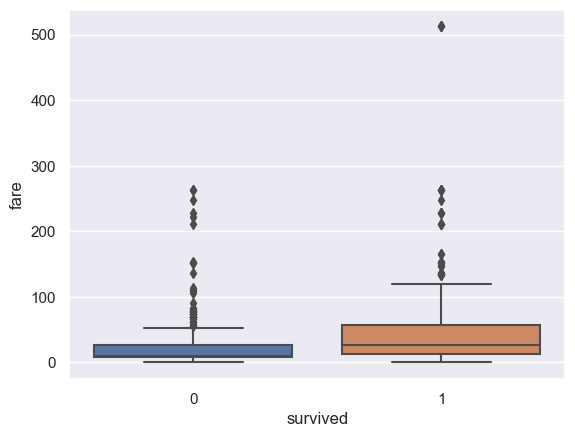

In [124]:
sns.boxplot(data=data, x='survived', y='fare')

<AxesSubplot:xlabel='embarked', ylabel='count'>

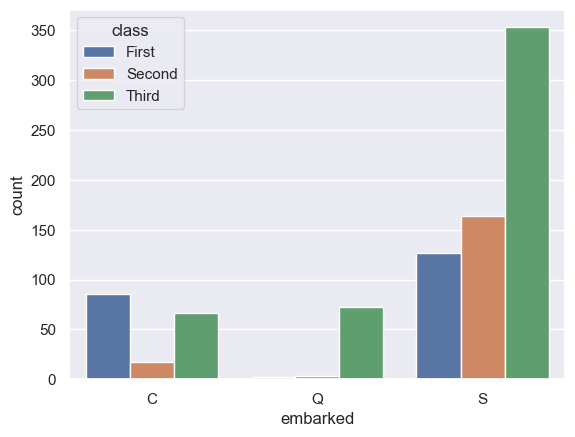

In [128]:
#5. 不同上船港口的乘客仓位等级人数分布（提示：箱图或者提琴图）
class_by_embarked = data.groupby('embarked')['class'].value_counts().reset_index(name='count')
sns.barplot(data=class_by_embarked, x='embarked', y='count', hue='class')

In [ ]:
# 6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
# 7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
# 8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

<AxesSubplot:xlabel='survived', ylabel='sibsp'>

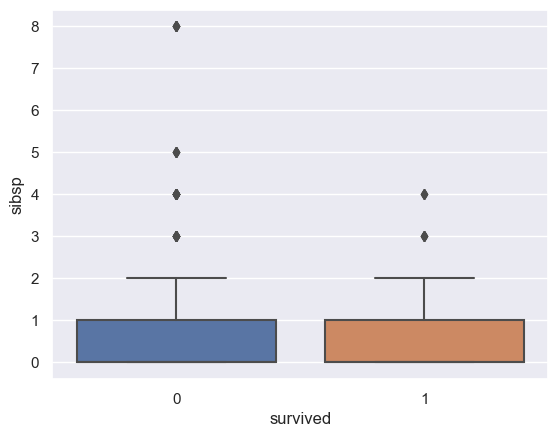

In [129]:
# 6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
sns.boxplot(data=data, x='survived', y='sibsp')

<AxesSubplot:xlabel='survived', ylabel='parch'>

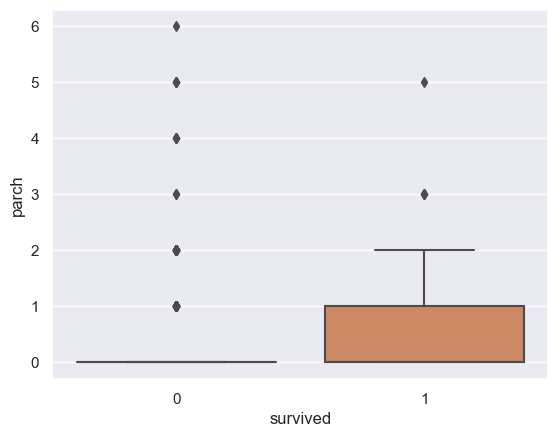

In [130]:
# 7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
sns.boxplot(data=data, x='survived', y='parch')


<AxesSubplot:xlabel='alone', ylabel='count'>

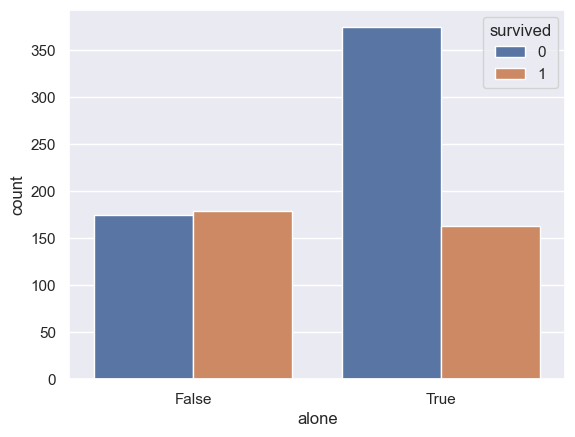

In [131]:
# 8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）
sns.countplot(data=data, x='alone', hue='survived')